# Jyro Python Robot Simulator

## Pure-Python simulator for robots.

In [1]:
from jyro.simulator import (Pioneer, Simulator, Camera,
                            PioneerFrontSonars, Gripper,
                            PioneerFrontLightSensors, Color)
import math

In [2]:
sim = Simulator()

In [3]:
sim.addBox(0, 0, 10, 10, fill="white", wallcolor="grey") # meters
sim.addBox(1, 1, 2, 2, "purple")
sim.addBox(7, 7, 8, 8, "purple")
## brightness of 1 is radius 1 meter
sim.addLight(7, 7, 4.25, color=Color(255, 255, 0, 64))

In [4]:
robot = Pioneer("Pioneer", 5.00, 5.00, math.pi / 2) # meters, radians
robot.addDevice(PioneerFrontSonars(maxRange=4.0))
robot.addDevice(Gripper())
robot.addDevice(PioneerFrontLightSensors())
sim.addRobot(robot)

In [5]:
from jyro.simulator.svgcanvas import SVGCanvas

canvas = SVGCanvas((250, 250))

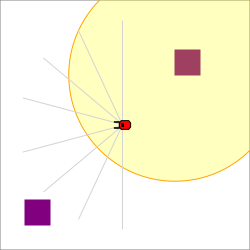

In [6]:
sim.draw(canvas)

In [7]:
sim["Pioneer"].getPose()

(5.0, 5.0, 1.5707963267948966)

In [8]:
sim["Pioneer"].move(1, 1)

In [9]:
from IPython.display import display, clear_output

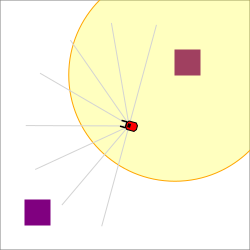

In [10]:
for i in range(500):
    sim.step()
    for r in sim.robots:
        sim.draw(canvas)
        clear_output(wait=True)
        display(canvas)

In [11]:
%%time

import numpy

light0 = numpy.zeros((100,100))
light1 = numpy.zeros((100,100))

for i in range(500):
    sim.step()
    for r in sim.robots:
        light0[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[0]        
        light1[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[1]

CPU times: user 580 ms, sys: 4 ms, total: 584 ms
Wall time: 587 ms


500 steps * 0.1 seconds/step = 50 seconds

50 seconds / 0.596

In [12]:
50 / 0.596

83.89261744966443

Looks like it simulates about 83 seconds for every real second, or is 83 times faster.

## Checking Light Readings

New simulated light sensors are 75% direct light and 25% ambient light.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

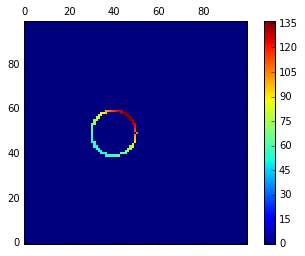

In [14]:
fig1 = plt.figure()
sp0 = fig1.add_subplot(111)
p0 = sp0.matshow(light0, origin="lower")
fig1.colorbar(p0)

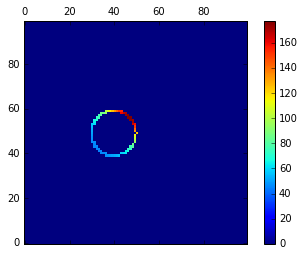

In [15]:
fig2 = plt.figure()
sp1 = fig2.add_subplot(111)
p1 = sp1.matshow(light1, origin="lower")
fig2.colorbar(p1)

## Differences between two light sensors

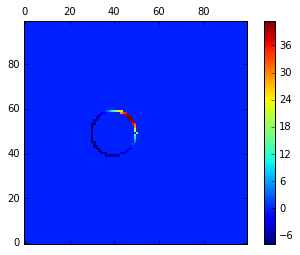

In [16]:
fig3 = plt.figure()
sp3 = fig3.add_subplot(111)
p3 = sp3.matshow(light1 - light0, origin="lower")
fig3.colorbar(p3)

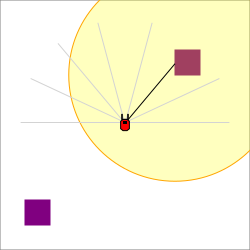

In [17]:
robot.setPose(5, 5, 0)
sim.draw(canvas)

In [18]:
light0 = numpy.zeros((100,100))
light1 = numpy.zeros((100,100))

for x in range(100):
    for y in range(100):
        for r in sim.robots:
            r.setPose(x/100 * 10, 
                      y/100 * 10, 
                      0) # facing up (north)
            r.updateDevices()
            light0[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[0]        
            light1[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[1]

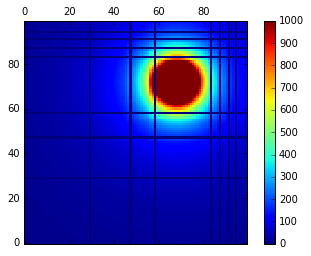

In [19]:
fig = plt.figure()
sp = fig.add_subplot(111)
p = sp.matshow(light0, origin="lower")
fig.colorbar(p)

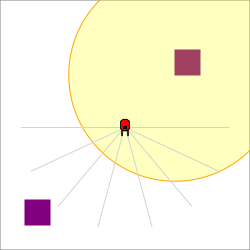

In [21]:
robot.setPose(5, 5, math.pi)
sim.draw(canvas)

In [22]:
light0 = numpy.zeros((100,100))
light1 = numpy.zeros((100,100))

for x in range(100):
    for y in range(100):
        for r in sim.robots:
            r.setPose(x/100 * 10, 
                      y/100 * 10, 
                      math.pi) # facing down (south)
            r.updateDevices()
            light0[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[0]        
            light1[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[1]

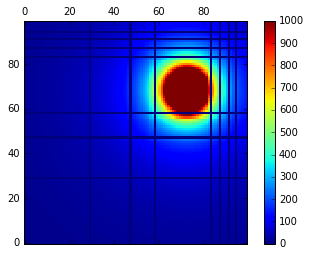

In [23]:
fig = plt.figure()
sp = fig.add_subplot(111)
p = sp.matshow(light0, origin="lower")
fig.colorbar(p)

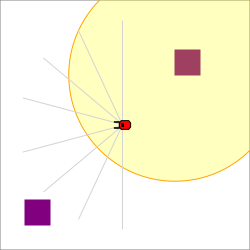

In [24]:
robot.setPose(5, 5, math.pi/2)
sim.draw(canvas)

In [25]:
light0 = numpy.zeros((100,100))
light1 = numpy.zeros((100,100))

for x in range(100):
    for y in range(100):
        for r in sim.robots:
            r.setPose(x/100 * 10, 
                      y/100 * 10, 
                      math.pi/2) # facing left (west)
            r.updateDevices()
            light0[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[0]        
            light1[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[1]

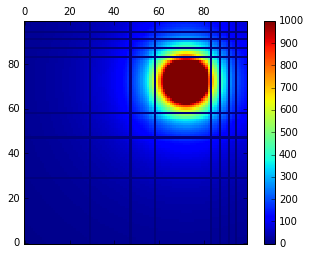

In [26]:
fig = plt.figure()
sp = fig.add_subplot(111)
p = sp.matshow(light0, origin="lower")
fig.colorbar(p)

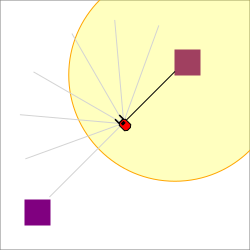

In [27]:
robot.setPose(5, 5, math.pi/4)
sim.draw(canvas)

In [28]:
light0 = numpy.zeros((100,100))
light1 = numpy.zeros((100,100))

for x in range(100):
    for y in range(100):
        for r in sim.robots:
            r.setPose(x/100 * 10, 
                      y/100 * 10, 
                      math.pi/4) # facing up, left (north west)
            r.updateDevices()
            light0[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[0]        
            light1[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[1]

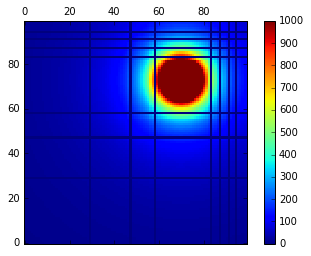

In [29]:
fig = plt.figure()
sp = fig.add_subplot(111)
p = sp.matshow(light0, origin="lower")
fig.colorbar(p)

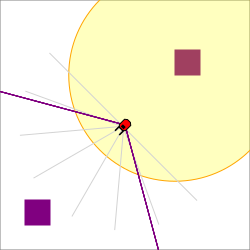

In [48]:
robot.setPose(5, 5, math.pi * 3/4)
sim.draw(canvas)

In [49]:
robot.addDevice(Camera(120, 80))

In [50]:
robot.updateDevices()

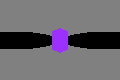

In [51]:
robot.device["camera"].getData()

In [52]:
robot.move(0, .5)
for i in range(10):
    sim.step()

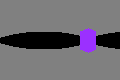

In [53]:
robot.device["camera"].getData()

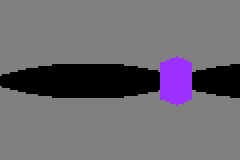

In [54]:
import PIL
img = robot.device["camera"].getData()
img = img.resize((240, 160))
img